<a href="https://colab.research.google.com/github/asifshakil2267/Cse317-NemericalMethod-ProblemSolvingSheet01/blob/main/Copy_of_Lab_Assignment_02_1822167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mirsazzathossain/CSE317-Lab/blob/main/Lab_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Find the following integral using the simpson's 1/3 rule**

Simpson's 1/3 rule uses higher-order polynomials to approximate the integral of a function $f(x)$ over the interval $[a,b]$. For Example, if there is an extra point midway between $f(a)$ and $f(b)$, the three points can be connected with a parabola. The area under the parabola is an approximation of the integral of $f(x)$ over the interval $[a,b]$.

<center>
    <img src="https://github.com/mirsazzathossain/CSE317-Lab/blob/main/images/simpson.PNG?raw=1" width="400" />
</center>

If we are given values of $f(x)$ at 3 points as $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ then we can estimate $f(x)$ using the Lagrange polynomial of degree 2:

$$
\begin{align*}
f(x) &\approx f(x_0) \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}
\end{align*}
$$

Now, as the area under the estimated curve is an approximation of the integral of $f(x)$ over the interval $[a,b]$, we can write the integral as:

$$
\begin{align*}
I &= \int_{a}^{b} f(x) dx \\
&\approx \int_{a}^{b} \left[f(x_0)\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} + f(x_1) \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} + f(x_2) \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \right] dx
\end{align*}
$$

When $a = x_0$, $b = x_2$, $x_1 = \frac{a+b}{2}$, and $h = \frac{b-a}{2}$, we can simplify the integral to:

$$
\begin{align*}
    I &\approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + f(x_2) \right] \\
    &= (b-a) \frac{f(x_0) + 4f(x_1) + f(x_2)}{6}
\end{align*}
$$

We will use Simpson's 1/3 rule to approximate the integral of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ over the interval $[0, 0.8]$. Follow the steps below to approximate the integral using Simpson's 1/3 rule.

##### **Step 1: Define the function**

Define a function `f` that takes a single parameter `x` and returns the value of $f(x) = 0.2 + 25x - 200x^2 + 675x^3 - 900x^4 + 400x^5$ at `x`. Note that the function should be able to handle both scalar and vector inputs.


In [ ]:
import numpy as np

def f(x):


    return 0.2 + 25*x - 200*x**2 + 675*x**3 - 900*x**4 + 400*x**5

##### **Step 2: Define a function to approximate the function $f(x)$ using Lagrange polynomial**

Define a function `lagrange` that takes four parameters `x0`, `x1`, `x2` and `x` and returns the value of the Lagrange polynomial of degree 2 at `x`. The function should be able to handle both scalar and vector inputs. Use the function `f` defined in Step 1 to evaluate the function at the given points.

In [ ]:
import numpy as np

def lagrange(x0, x1, x2, x):

    # Calculate function values at interpolation points
    f_x0 = f(x0)
    f_x1 = f(x1)
    f_x2 = f(x2)

    # Calculate Lagrange basis polynomials
    L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))
    L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))
    L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))

    # Combine to form the Lagrange polynomial
    return f_x0 * L0 + f_x1 * L1 + f_x2 * L2

##### **Step 3: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [ ]:
import numpy as np

interval = np.array([0, 1])

##### **Step 4: Plot the function and the approximated polynomial**

Plot the function $f(x)$ and the approximated polynomial using the function `lagrange` defined in Step 2. Use the interval defined in Step 3 as the x-axis. Also, plot the points $(x_0, f(x_0))$, $(x_1, f(x_1))$, and $(x_2, f(x_2))$ on the same plot. Fill the area under the approximated polynomial using numpy's `fill_between` function.

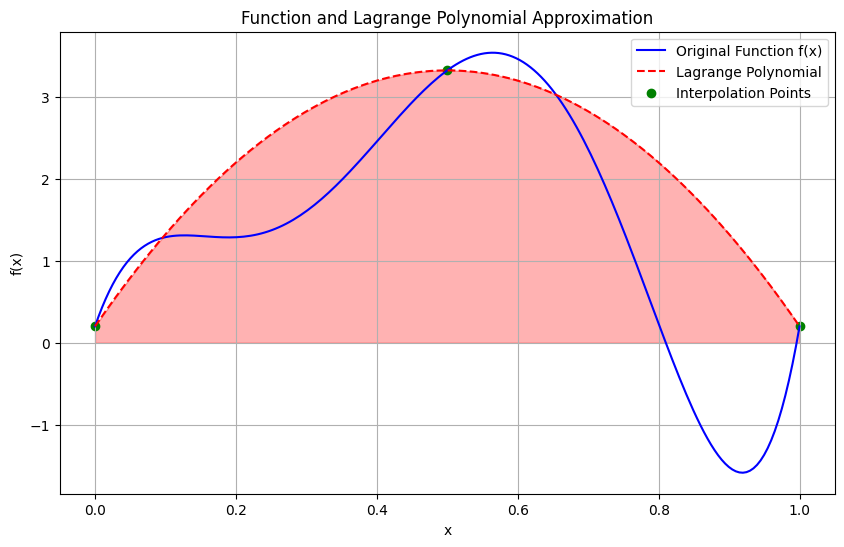

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange(x0, x1, x2, x):

    L0 = ((x - x1) * (x - x2)) / ((x0 - x1) * (x0 - x2))
    L1 = ((x - x0) * (x - x2)) / ((x1 - x0) * (x1 - x2))
    L2 = ((x - x0) * (x - x1)) / ((x2 - x0) * (x2 - x1))


    return f(x0) * L0 + f(x1) * L1 + f(x2) * L2


plt.figure(figsize=(10, 6))

x = np.linspace(interval[0], interval[1], 200)

plt.plot(x, f(x), label='Original Function f(x)', color='blue')

x0, x1, x2 = interval[0], (interval[0] + interval[1])/2, interval[1]

lagrange_y = lagrange(x0, x1, x2, x)
plt.plot(x, lagrange_y, label='Lagrange Polynomial', color='red', linestyle='--')


plt.fill_between(x, lagrange_y, alpha=0.3, color='red')

plt.scatter([x0, x1, x2], [f(x0), f(x1), f(x2)], color='green', label='Interpolation Points')

plt.title('Function and Lagrange Polynomial Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

##### **Step 5: Define a function to approximate the integral using Simpson's 1/3 rule**

Define a function `simpson` that takes a parameter `interval` and returns the approximate value of the integral of $f(x)$ over the interval `interval` using Simpson's 1/3 rule. You have to employ the following steps:

*   Calculate the midpoint of the interval. Store the value in a variable named `midpoint`.
*   Calculate the value of $f(x_0)$, $f(x_1)$, and $f(x_2)$, where $x_0 = a$, $x_1 = \frac{a+b}{2} = midpoint$, and $x_2 = b$. Store the values in variables named `f0`, `f1`, and `f2` respectively.
*   Calculate the approximate value of the integral using Simpson's 1/3 rule. Store the value in a variable named `I`.
*   Return the value of `I`.

In [ ]:
def simpson(interval):

    a, b = interval


    midpoint = (a + b) / 2


    f0 = f(a)
    f1 = f(midpoint)
    f2 = f(b)


    I = (b - a) / 6 * (f0 + 4 * f1 + f2)

    return I

##### **Step 6: Approximate the integral using Simpson's 1/3 rule**

Call the function `simpson` with the interval `interval` as the parameter. Store the value returned by the function in a variable named `I`. Print the value of `I`. Then you should compute the integral analytically and find the absolute relative error between the two values. Print the absolute relative error.

In [ ]:
I = simpson(interval)
print(f"Approximate integral value: {I}")

def F(x):
    return 0.2*x + 25*x**2/2 - 200*x**3/3 + 675*x**4/4 - 900*x**5/5 + 400*x**6/6

I_exact = F(interval[1]) - F(interval[0])
print(f"Exact integral value: {I_exact}")

abs_rel_error = abs((I - I_exact) / I_exact) * 100
print(f"Absolute relative error: {abs_rel_error}%")

Approximate integral value: 2.283333333333333
Exact integral value: 1.4500000000000028
Absolute relative error: 57.47126436781578%
